In [ ]:
!pip install timesfm

In [ ]:
import timesfm

2024-09-25 22:42:31.998296: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
import os
import yfinance as yf
import timesfm
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Set JAX to use CPU
os.environ['JAX_PLATFORMS'] = 'cpu'

In [ ]:
ticker = 'IWDA.AS'  # Replace with your desired ticker symbol
data1 = yf.download(ticker, start = '2022-01-01', end = '2023-01-01' , interval='1d')
data2 = data1.tail(251)

#print(data2)
# Prepare DataFrame in the required format
data2.reset_index(inplace=True)
input_df = pd.DataFrame({
    'unique_id': [ticker]*len(data2),
    'ds': data2['Date'],
    'y': data2['Adj Close']
})
pd.set_option('display.max_rows', 300)
#print(input_df)
#

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Fetch stock data from Yahoo Finance
# ticker = '^GSPC'  # Replace with your desired ticker symbol
data = yf.download(ticker, start='2022-01-01', end='2023-01-01', interval='1d')

# Prepare DataFrame in the required format
data.reset_index(inplace=True)
input_df2 = pd.DataFrame({
    'unique_id': [ticker]*len(data),
    'ds': data['Date'],
    'y': data['Close']
})

# Initialize the model
tfm = timesfm.TimesFm(
    context_len=512,
    horizon_len=100,
    input_patch_len=32,
    output_patch_len=128,
    num_layers=20,
    model_dims=1280,
    backend='cpu',  # 'jax' or 'pytorch'
)

# Load the checkpoint
tfm.load_from_checkpoint(repo_id="google/timesfm-1.0-200m")

# Forecast using the DataFrame
forecast_df = tfm.forecast_on_df(
    inputs=input_df,
    freq="D",
    value_name="y",
    num_jobs=-1,
)

# Print the forecasted values
#print(forecast_df)

# Optional: Forecast using array inputs
forecast_input = [
    input_df['y'].values  # Using the 'y' column as input
]
frequency_input = [0]  # High frequency, daily data

point_forecast, experimental_quantile_forecast = tfm.forecast(
    forecast_input,
    freq=frequency_input,
)

# Print the forecasted values
#print(point_forecast)

[*********************100%***********************]  1 of 1 completed

Multiprocessing context has already been set.


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing model weights.


Constructed model weights in 4.14 seconds.
Restoring checkpoint from /root/.cache/huggingface/hub/models--google--timesfm-1.0-200m/snapshots/8775f7531211ac864b739fe776b0b255c277e2be/checkpoints.


ERROR:absl:For checkpoint version > 1.0, we require users to provide
          `train_state_unpadded_shape_dtype_struct` during checkpoint
          saving/restoring, to avoid potential silent bugs when loading
          checkpoints to incompatible unpadded shapes of TrainState.


Restored checkpoint in 0.70 seconds.
Jitting decoding.
Jitted decoding in 32.83 seconds.
Processing dataframe with multiple processes.


2024-09-25 23:55:27.686949: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Finished preprocessing dataframe.
Finished forecasting.


[*********************100%***********************]  1 of 1 completed


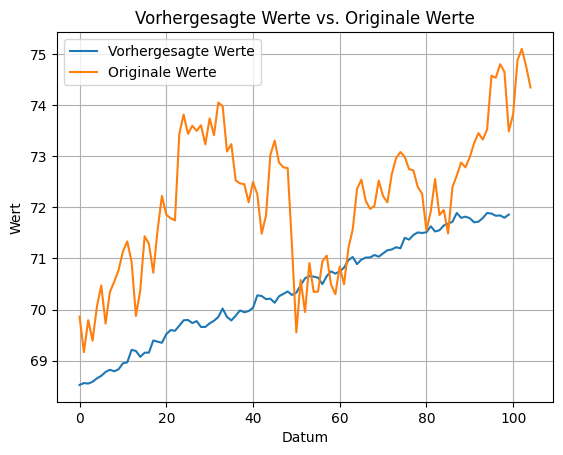

In [ ]:
# Fetch stock data from Yahoo Finance
data_original = yf.download(ticker, start = '2023-01-01', end = '2023-06-01' , interval='1d')

# Prepare DataFrame in the required format
data_original.reset_index(inplace=True)
data_original_df = pd.DataFrame({
    'unique_id': [ticker]*len(data_original),
    'ds': data_original['Date'],
    'y': data_original['Adj Close']
})

# Angenommen, die Werte sind in der ersten Position von point_forecast gespeichert
forecast_values = point_forecast[0]

# Originale y-Werte aus dem DataFrame
original_values = data_original_df['y']

# Erstellen des Liniendiagramms mit zwei Linien
plt.plot(forecast_values, label='Vorhergesagte Werte')
plt.plot(original_values, label='Originale Werte')

# Titel und Achsenbeschriftungen
plt.title('Vorhergesagte Werte vs. Originale Werte')
plt.xlabel('Datum')
plt.ylabel('Wert')

# Legende hinzufügen, um die Linien zu unterscheiden
plt.legend()

# Gitter hinzufügen
plt.grid(True)

# Diagramm anzeigen
plt.show()

[*********************100%***********************]  1 of 1 completed


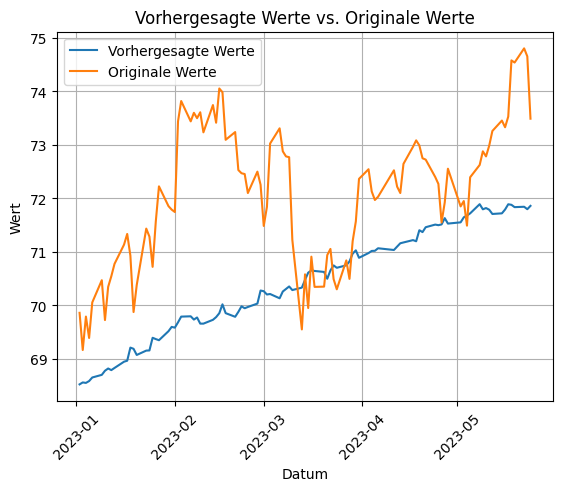

In [ ]:
# Fetch stock data from Yahoo Finance
data_original = yf.download(ticker, start='2023-01-01', end='2023-05-25', interval='1d')

# Prepare DataFrame in the required format
data_original.reset_index(inplace=True)
data_original_df = pd.DataFrame({
    'unique_id': [ticker] * len(data_original),
    'ds': data_original['Date'],
    'y': data_original['Adj Close']
})

# Angenommen, die Werte sind in der ersten Position von point_forecast gespeichert
forecast_values = point_forecast[0]

# Originale y-Werte aus dem DataFrame
original_values = data_original_df['y']

# Datumswerte aus dem DataFrame
dates = data_original_df['ds']

# Erstellen des Liniendiagramms mit zwei Linien, dabei Datumswerte für die x-Achse verwenden
plt.plot(dates, forecast_values[:len(dates)], label='Vorhergesagte Werte')
plt.plot(dates, original_values, label='Originale Werte')

# Titel und Achsenbeschriftungen
plt.title('Vorhergesagte Werte vs. Originale Werte')
plt.xlabel('Datum')
plt.ylabel('Wert')

# Legende hinzufügen, um die Linien zu unterscheiden
plt.legend()

# Gitter hinzufügen
plt.grid(True)

# Achsenbeschriftungen rotieren, um die Lesbarkeit zu verbessern
plt.xticks(rotation=45)

# Diagramm anzeigen
plt.show()
